In [98]:
import tensorflow 

b'hello world'


In [90]:
import tensorflow.keras.backend as K
 
print(keras.__version__)

2.4.3


In [2]:
import os

In [3]:
TRAIN_PATH = os.getcwd()+"\\Train"
VAL_PATH = os.getcwd()+"\\Val"

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import keras 
from keras.layers import *
from keras.models import *
from keras.preprocessing import image

In [66]:
# For CNF MATRIX
import itertools


In [5]:
# CNN based model in keras
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation="relu",input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0

In [7]:
#Train from scratch
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [8]:
train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size = (224,224),
    batch_size = 32,
    class_mode= 'binary'
)



Found 272 images belonging to 2 classes.


In [9]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [10]:
validation_generator = test_dataset.flow_from_directory(
    VAL_PATH,
    target_size = (224,224),
    batch_size = 32,
    class_mode= 'binary'
)


Found 120 images belonging to 2 classes.


In [11]:
validation_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [77]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=2
)

Epoch 1/100
8/8 [==============================] - 22s 3s/step - loss: 0.1210 - accuracy: 0.9500 - val_loss: 0.0539 - val_accuracy: 0.9688
Epoch 2/100
8/8 [==============================] - 22s 3s/step - loss: 0.1174 - accuracy: 0.9458 - val_loss: 0.1336 - val_accuracy: 0.9531
Epoch 3/100
3/8 [==========>...................] - ETA: 8s - loss: 0.1751 - accuracy: 0.9271

KeyboardInterrupt: 

In [13]:
model.save("covid_diagnosis.h5")

In [14]:
model.evaluate_generator(train_generator)

Instructions for updating:
Please use Model.evaluate, which supports generators.


[0.1537056565284729, 0.9742646813392639]

In [15]:
model.evaluate_generator(validation_generator)

[0.13283783197402954, 0.9916666746139526]

In [16]:
model = load_model('covid_diagnosis.h5')

In [17]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [18]:
y_actual = []
y_test = []

In [20]:
for i in os.listdir(f"{VAL_PATH}\\Normal"):
    img= image.load_img(f"{VAL_PATH}\\Normal\\{i}", target_size=(224,224))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    p=model.predict_classes(img)
    y_test.append(p[0,0])
    y_actual.append(1)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [22]:
for i in os.listdir(f"{VAL_PATH}\\Covid"):
    img= image.load_img(f"{VAL_PATH}\\Covid\\{i}", target_size=(224,224))
    img=image.img_to_array(img)
    img=np.expand_dims(img,axis=0)
    p=model.predict_classes(img)
    y_test.append(p[0,0])
    y_actual.append(0)

In [23]:
from sklearn.metrics import confusion_matrix


In [24]:
cm = confusion_matrix(y_actual,y_test)

In [25]:
import seaborn as sns

<AxesSubplot:>

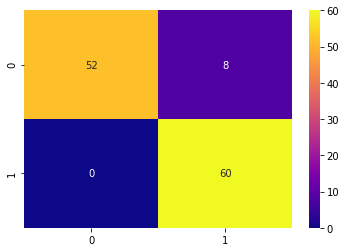

In [26]:
sns.heatmap(cm,cmap="plasma",annot=True)

In [31]:
# from keras.utils.vis_utils import plot_model

# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
hist

In [58]:
def plot_history(history):
    '''
    Function that plots the loss function and the accuracy
    Params:
        - history : the output of during the training
    '''
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'g', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'b', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'g', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

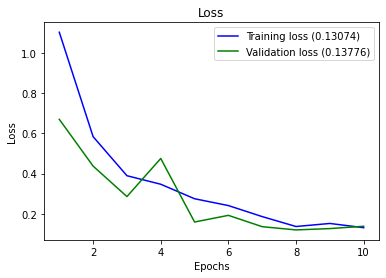

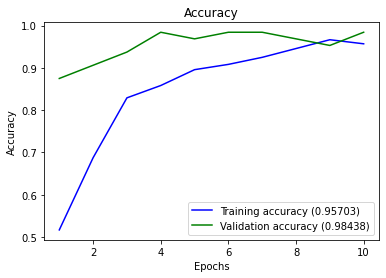

In [59]:
plot_history(hist)

In [74]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        title='Normalized confusion matrix'
    else:
        title='Confusion matrix'

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    

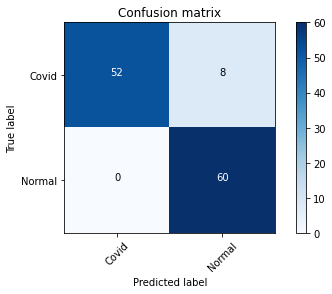

In [75]:
# Plot confusion matrix
classes = {'Covid': 0, 'Normal': 1}
cnf_matrix = confusion_matrix(y_actual,y_test)
plot_confusion_matrix(cnf_matrix,classes)


In [ ]:
!pip3 install--upgrade --force-reinstall tensorflow-gpu 